In [1]:
import gzip
import pickle

import numpy as np
import graphviz
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
mendelian_errors = pickle.load(gzip.open('mendelian_errors.pickle.gz', 'rb'))
feature_fit = np.load(gzip.open('feature_fit.npy.gz', 'rb'))
ordered_features = pickle.load(open('ordered_features', 'rb'))

# Cost function

In [3]:
ordered_features

['DP', 'FS', 'HRun', 'MQ0', 'QD', 'QUAL', 'ReadPosRankSum']

In [4]:
mendelian_errors[473]

(0, 0)

# Decision Tree

In [5]:
train_X = feature_fit[:,:-1]
train_Y = feature_fit[:,-1]

In [6]:
forest_estimator = RandomForestClassifier(n_estimators=10)
forest_fit = forest_estimator.fit(train_X, train_Y)

In [14]:
forest_fit.feature_importances_

array([1., 0., 0., 0., 0., 0., 0.])

In [8]:
estimator = tree.DecisionTreeClassifier()
tree_fit = estimator.fit(train_X, train_Y)

In [9]:
graphviz_representation = tree.export_graphviz(tree_fit, out_file=None,
                                               max_depth=4,
                                               feature_names=ordered_features,
                                               filled=True, rounded=True, special_characters=True)
#class_names
graph = graphviz.Source(graphviz_representation)
#render

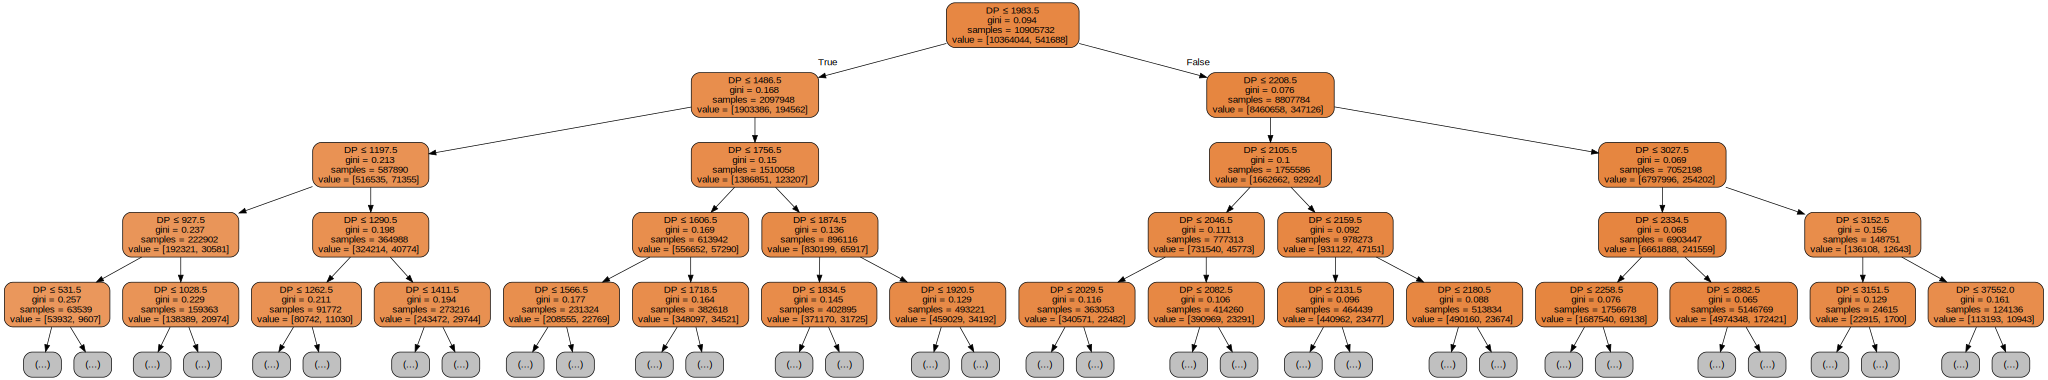

In [10]:
graph

In [11]:
len(train_X), len(train_Y)

(10905732, 10905732)

In [12]:
train_X.shape, train_Y.shape

((10905732, 7), (10905732,))

In [13]:
len([x for x in train_Y if x >0])

541688